# Texas Tower Buoy data

![title](3m_mini.jpg)


In the directory is a comma-separated-value (csv) text file with data from the Texas Tower #4 bouy (https://www.ndbc.noaa.gov/station_page.php?station=44066) offshore of New Jersey. 

We are going to use this data to practice our skills with loading and analysing data using pandas. 

The file is `44066_erddap.txt`. The 44066 is the station number for the National Data Buoy Center that deploys these things. ERDDAP is a data access server where I got the data (https://coastwatch.pfeg.noaa.gov/erddap/tabledap/cwwcNDBCMet.html) . We will learn a lot more about ERDDAP later, but for now this is just a dataset I've downloaded. 

# 1. What's in the file
First just open the data file with a program of your choosing. You can open it right here in Jupyter Lab by clicking on the file in the filelist on the left. You can use also any normal text editor, or probably excel. Write a short description of what you see

In [ ]:
## answer here
#Large data file with 20 coloumns and over 8000 rows
# for the coloumns: station,longitude,latitude,time,wd,wspd,gst,wvht,dpd,apd,mwd,bar,atmp,wtmp,dewp,vis,ptdy,tide,wspu,wspv
#these are the units for each one,degrees_east,degrees_north,UTC,degrees_true,m s-1,m s-1,m,s,s,degrees_true,hPa,degree_C,degree_C,degree_C,km,hPa,m,m s-1,m s-1

# 2. Load and clean up the data with Pandas

Like we did in class, we are going to load the data and get it into a useable format. Do this in stages, building up to your best dataframe using a few codes cells to explore along the way.

### 2a
 Start by loading using pandas `read_csv()`without any frills. Call your dataframe `df` and display the first 5 lines of the `df`. (hint, remember to import your libraries first!)

In [2]:
# answer here

#first do your imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# load the dataset using pandas

df= pd.read_csv("44066_erddap.txt")
df.head()

,station,longitude,latitude,time,wd,wspd,gst,wvht,dpd,apd,mwd,bar,atmp,wtmp,dewp,vis,ptdy,tide,wspu,wspv
0,NaN,degrees_east,degrees_north,UTC,degrees_true,m s-1,m s-1,m,s,s,degrees_true,hPa,degree_C,degree_C,degree_C,km,hPa,m,m s-1,m s-1
1,44066.0,-72.601,39.583,2018-01-01T00:00:00Z,330,10.0,13.8,1.79,5.56,4.82,319,1023.5,-4.7,11.3,-8.6,NaN,NaN,NaN,5.0,-8.7
2,44066.0,-72.601,39.583,2018-01-01T01:00:00Z,335,10.8,14.8,1.78,6.25,4.87,310,1023.6,-4.6,11.4,-7.9,NaN,NaN,NaN,4.6,-9.8
3,44066.0,-72.601,39.583,2018-01-01T02:00:00Z,334,9.6,12.9,1.62,6.25,4.6,298,1023.7,-5.2,11.4,-9.2,NaN,NaN,NaN,4.2,-8.6
4,44066.0,-72.601,39.583,2018-01-01T03:00:00Z,321,8.9,13.0,1.56,6.25,4.63,311,1024.2,-5.6,11.4,-9.8,NaN,NaN,NaN,5.6,-6.9


### 2b
Looks pretty good. Pandas seems to have gotten all the column label right! There is one weird thing though: row `0` looks like it doesn't have numerical data, but has some strings like 'degrees_north' and 'km'. What is your guess about what those strings are? (write you answer as a comment in the cell below)

Let's ask pandas to ignore that row when it imports our data. We can do this using an option in `pd.read_csv()` called `skip_rows=[]`. We give `skip_rows` a list of all the rows we want to skip. What row do we want to skip? Remember that as we are reading in the first row (called row `0` in computer-speak) contains the column labels we want to keep. It's the file's *second* row (1 in compu-speak) that has the info we want to throw out. So we want to use the option `skip_rows=[1]` in `pd.read_csv()` to skip that row. 

Read in the file to a dataframe called `df` using this option.


print the first 5 lines of the dataframe `df`

In [4]:
## answer here
df= pd.read_csv(("44066_erddap.txt"), skiprows=[1])
df.head()


,station,longitude,latitude,time,wd,wspd,gst,wvht,dpd,apd,mwd,bar,atmp,wtmp,dewp,vis,ptdy,tide,wspu,wspv
0,44066,-72.601,39.583,2018-01-01T00:00:00Z,330.0,10.0,13.8,1.79,5.56,4.82,319.0,1023.5,-4.7,11.3,-8.6,NaN,NaN,NaN,5.0,-8.7
1,44066,-72.601,39.583,2018-01-01T01:00:00Z,335.0,10.8,14.8,1.78,6.25,4.87,310.0,1023.6,-4.6,11.4,-7.9,NaN,NaN,NaN,4.6,-9.8
2,44066,-72.601,39.583,2018-01-01T02:00:00Z,334.0,9.6,12.9,1.62,6.25,4.60,298.0,1023.7,-5.2,11.4,-9.2,NaN,NaN,NaN,4.2,-8.6
3,44066,-72.601,39.583,2018-01-01T03:00:00Z,321.0,8.9,13.0,1.56,6.25,4.63,311.0,1024.2,-5.6,11.4,-9.8,NaN,NaN,NaN,5.6,-6.9
4,44066,-72.601,39.583,2018-01-01T04:00:00Z,339.0,9.4,12.0,1.51,5.88,4.66,317.0,1023.8,-5.3,11.4,-9.0,NaN,NaN,NaN,3.4,-8.8


### 2c

Looking really good. 

We used this option `skip_rows=[]`, but we didn't talk about it in class, so how are you supposed to know about that? You aren't! There are a million options in our python functions, and as you go you are just going to slowly learn about some. But the important lesson here is that if you want to do something (like skip a row) python probably has a way to do it. **Google is your friend.** If you google enough stuff, like "skip row pandas read_csv" which is basically just a description of what you wanted to do, I bet you will find some good info. There is also great documentation for all python functions. For pandas it's:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html . Here you will find a lot of info about all the options you can use with `pd.read_csv()`.

**You will find you use google and the documententation for different libraries all the time. I do.**

OK, there is one last thing we want to do. We are almost there. Let's make a datetime index so we can use pandas time tools. We can see that we have columns for `time` already in a nice format, great. We should be able to turn this into a pandas `datetime` object, then set the `index` of the dataframe to that. 

In class we used the `parse_dates= [column]` option in pandas to read in a column as a special datetime object. Let's do that and tell pandas we want to use the column `time` as the index. We can do this all in one line using the options  `parse_dates= ["some_column"]` and `index_col=["some_column"]`.

Do this in the space below and print the first 5 lines


In [17]:
## answer here
df= pd.read_csv(("44066_erddap.txt"), skiprows=[1], parse_dates = ["time"], index_col = ["time"] )
df.head()


,station,longitude,latitude,wd,wspd,gst,wvht,dpd,apd,mwd,bar,atmp,wtmp,dewp,vis,ptdy,tide,wspu,wspv
time,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,44066,-72.601,39.583,330.0,10.0,13.8,1.79,5.56,4.82,319.0,1023.5,-4.7,11.3,-8.6,NaN,NaN,NaN,5.0,-8.7
2018-01-01 01:00:00+00:00,44066,-72.601,39.583,335.0,10.8,14.8,1.78,6.25,4.87,310.0,1023.6,-4.6,11.4,-7.9,NaN,NaN,NaN,4.6,-9.8
2018-01-01 02:00:00+00:00,44066,-72.601,39.583,334.0,9.6,12.9,1.62,6.25,4.60,298.0,1023.7,-5.2,11.4,-9.2,NaN,NaN,NaN,4.2,-8.6
2018-01-01 03:00:00+00:00,44066,-72.601,39.583,321.0,8.9,13.0,1.56,6.25,4.63,311.0,1024.2,-5.6,11.4,-9.8,NaN,NaN,NaN,5.6,-6.9
2018-01-01 04:00:00+00:00,44066,-72.601,39.583,339.0,9.4,12.0,1.51,5.88,4.66,317.0,1023.8,-5.3,11.4,-9.0,NaN,NaN,NaN,3.4,-8.8


Great. This is the data in the format we want. We can load it and get it all into shape in one line. 

However, we needed to wrangle the data a little from its original format to be useful: we needed to drop the units row, we had to convert the time column into a pandas `datetime` format, and we needed to set the index. **This is the type of wrangling you will do with data A LOT!** Sometimes we will need to use even more complicated sets of options to get our data into a useful format. Thinking hard about reading and formatting our data correctly is one of the first things we will do on any project.

### 2d

In the next two cells get a summary of the data types in the data frame, and the descriptive statistics. Recall we had a method for each of these things in class, should just be one line

In [14]:
# get basic dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 2018-01-01T00:00:00Z to 2019-01-01T00:00:00Z
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    8761 non-null   int64  
 1   longitude  8761 non-null   object 
 2   latitude   8761 non-null   float64
 3   wd         7599 non-null   float64
 4   wspd       7914 non-null   float64
 5   gst        7914 non-null   float64
 6   wvht       7914 non-null   float64
 7   dpd        7914 non-null   float64
 8   apd        7914 non-null   float64
 9   mwd        7914 non-null   float64
 10  bar        7914 non-null   float64
 11  atmp       7912 non-null   float64
 12  wtmp       4595 non-null   float64
 13  dewp       4980 non-null   float64
 14  vis        0 non-null      float64
 15  ptdy       1415 non-null   float64
 16  tide       0 non-null      float64
 17  wspu       7599 non-null   float64
 18  wspv       7599 non-null   float64
dtypes: float64(17), in

In [7]:
# get descriptive statistics
df.describe()

,station,latitude,wd,wspd,gst,wvht,dpd,apd,mwd,bar,atmp,wtmp,dewp,vis,ptdy,tide,wspu,wspv
count,8761.0,8.761000e+03,7599.000000,7914.000000,7914.000000,7914.000000,7914.000000,7914.000000,7914.000000,7914.000000,7912.000000,4595.000000,4980.000000,0.0,1415.000000,0.0,7599.00000,7599.000000
mean,44066.0,3.958300e+01,196.688117,7.116288,8.696639,1.611032,7.661543,5.494256,171.701794,1017.172403,12.499393,10.895909,8.305723,NaN,0.010247,NaN,1.40154,-0.287551
std,0.0,7.390066e-13,98.833436,3.666842,4.506658,1.030283,2.315966,1.090756,82.936116,8.389026,7.654216,4.433177,8.896209,NaN,2.164220,NaN,5.56111,5.579146
min,44066.0,3.958300e+01,0.000000,0.000000,0.000000,0.310000,2.600000,3.200000,0.000000,975.400000,-7.200000,6.300000,-11.800000,NaN,-9.300000,NaN,-19.60000,-22.500000
25%,44066.0,3.958300e+01,112.000000,4.300000,5.200000,0.900000,5.880000,4.710000,105.000000,1012.300000,6.500000,7.600000,1.000000,NaN,-1.100000,NaN,-2.10000,-4.200000
50%,44066.0,3.958300e+01,209.000000,6.800000,8.100000,1.310000,7.140000,5.310000,161.000000,1017.200000,11.300000,9.100000,9.300000,NaN,0.000000,NaN,1.80000,0.200000
75%,44066.0,3.958300e+01,280.000000,9.500000,11.600000,2.000000,9.090000,6.077500,219.000000,1022.000000,18.800000,12.700000,14.700000,NaN,1.300000,NaN,5.00000,3.900000
max,44066.0,3.958300e+01,359.000000,23.500000,29.700000,9.260000,17.390000,12.010000,359.000000,1042.300000,27.700000,25.400000,25.200000,NaN,11.500000,NaN,18.70000,18.000000


# 3 Plotting

### 3a

Make a simple plot of one of the columns of data. They have stange names, but they *almost* make sense: `wtmp` is water temperature and `atmp` is air temperature. 

Pick one and make a plot of that column vs time. Make sure the x axis shows the date, and the yaxis is your temperature. Look at the example from class if you need a reminder of how to do this. Remember that pandas can make simple plots very easily because it knows roughly what you probably want when looking at a data timeseries

<Axes: xlabel='time'>

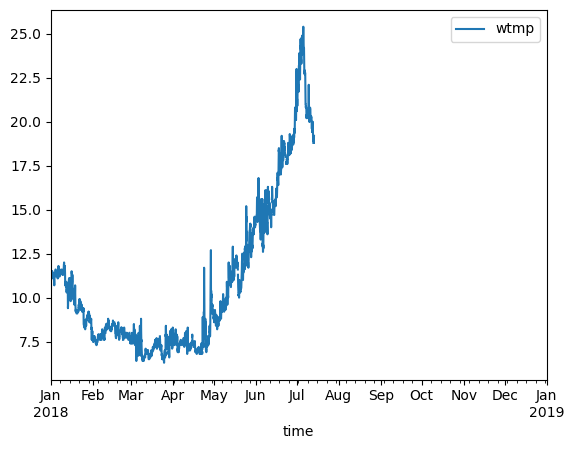

In [18]:
## answer here

df[["wtmp"]].plot()



### 3b

Plot air temperature and water temperature on the same plot. 

In a comment in the code cell write a little about the two timeseries of data:
* Why do they have the general shape the have? 
* How are they alike and how are they different? 
* Which data record is longer? 
* Is air temperature or water temperature more variable? 

<Axes: xlabel='time'>

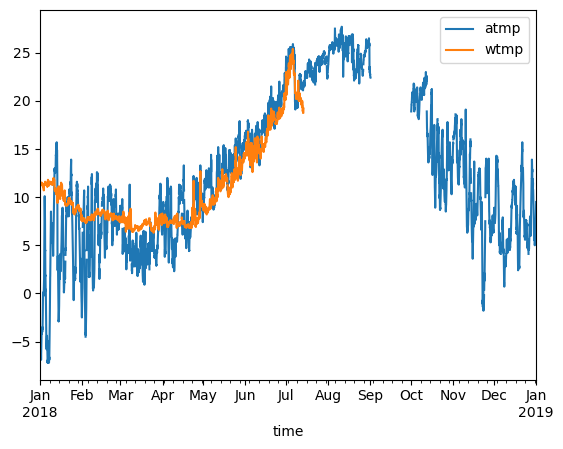

In [24]:
## answer here
df[[ "atmp", "wtmp"]].plot()
#The temp for both increases from jan 2018 to into the summer months
# The Wtmp is stops in the summer around july where the air temp is recorded into the following fall and winter
# The air temps data record is longer 
# Air temp has much higher levels of variability

### 3c

In class we used the `pd.resample()` function to get the data in monthly groups. We then used the `mean()` function to get monthly averages. In the space below get *weekly* groups of the air temperature data and take the mean to get weekly means. First plot the raw air temperatures, then plot the weekly mean temperature on top. 

Hint: in class we used `pd.resample('MS')`, where `'MS'` told pandas to group by month. The input to tell pandas to group by week is `'W'`. 

In [21]:
#rs = df.resample("W")
#rs

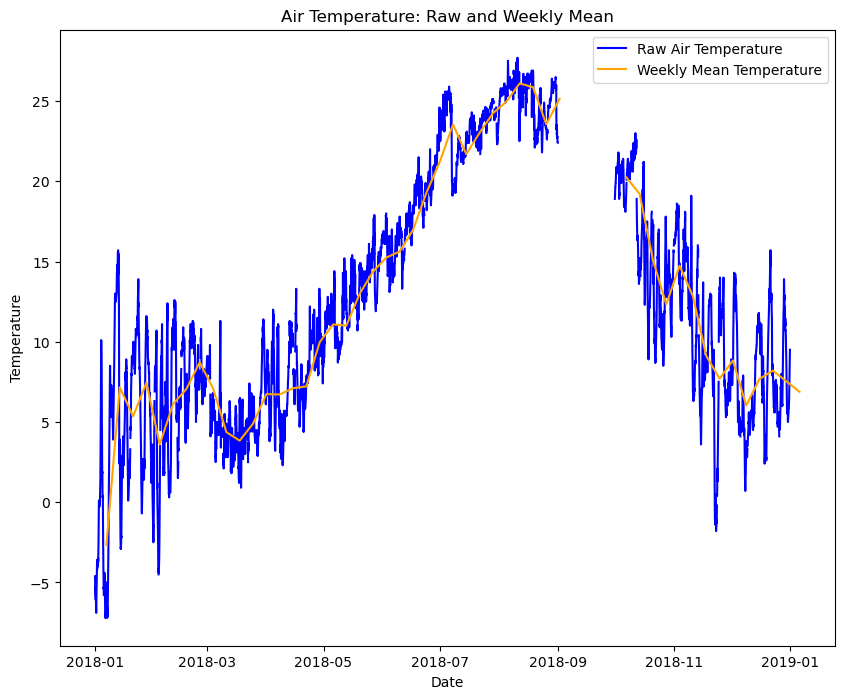

In [30]:
rs=df[ ["atmp"]].resample("W").mean()
## answer here
plt.figure(figsize=(10,8))
plt.plot(df.index, df['atmp'], label='Raw Air Temperature', color='blue')
plt.plot(rs.index, rs['atmp'], label='Weekly Mean Temperature', color='orange')


plt.title('Air Temperature: Raw and Weekly Mean')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### 3d

Let's try a new type of plot. 

So far we have plotted an observation (column) from our dataframe vs time using pandas built-in plotting. Let's say we want to do something a little more custom, like plot two of the columns against eachother. 

For this we are going to use another python library called `matplotlib` - this is the workhorse for most plotting. Almost everything we need is in a part of `matplotlib` called `pyplot`. The standard way to import the things we need from `matplotlib` is: 

```python
import matplotlib.pyplot as plt
```

Now `plt` has many differnent types of plots inside. One we will use a lot to plot two things against one another is `plt.scatter(x, y)`, where x and y are the two variables we want to look at. Let's try this using the windspeed and wave hight that are in our dataframe. The windspeed column is `df['wspd']` and waveheight is `df['wvht']`. 

Import `matplotlib.pyplot` as described above, then use `plt.scatter(x, y)` where you insert the wavehight column for y and windspeed for x. 

One more thing: we need to always label our axis!!!! we can do this from matplotlib using `plt.xlabel(' the x axis label')` and `plt.xlabel(' the y axis label')`. Make sure to add the correct labels to your scatter plot. 

In a comment take a guess about what the rough shape of the scattered data points in the plot mean about the ocean (about wind and waves)

Text(0.5, 1.0, 'Wave Height vs Wind Speed')

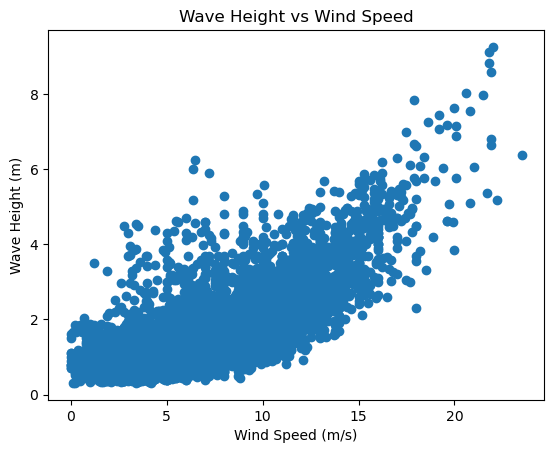

In [33]:
## answer here, don't forget to import matplotlib.pyplot!
plt.scatter(df["wspd"] , df["wvht"])
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Wave Height (m)")
plt.title( "Wave Height vs Wind Speed")



In [ ]:
#correlation between higher wind speed and larger wave heights